# K-Means Clustering

### Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

### Importing the dataset

In [31]:
dataset = pd.read_csv('Network_Intrusion_Detection_Dataset.csv')
#X = dataset.iloc[:,:41].values

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52777 entries, 0 to 52776
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     52777 non-null  int64  
 1   protocol_type                52777 non-null  int64  
 2   service                      52777 non-null  object 
 3   flag                         52777 non-null  object 
 4   src_bytes                    52777 non-null  int64  
 5   dst_bytes                    52777 non-null  int64  
 6   land                         52777 non-null  int64  
 7   wrong_fragment               52777 non-null  int64  
 8   urgent                       52777 non-null  int64  
 9   hot                          52777 non-null  int64  
 10  num_failed_logins            52777 non-null  int64  
 11  logged_in                    52777 non-null  int64  
 12  num_compromised              52777 non-null  int64  
 13  root_shell      

In [32]:
dataset.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [35]:
dataset["protocol_type"]
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

0         tcp
1         tcp
2         tcp
3         tcp
4         tcp
         ... 
52772    icmp
52773    icmp
52774    icmp
52775    icmp
52776    icmp
Name: protocol_type, Length: 52777, dtype: object

### Data preprocessing

In [44]:
labelencoder = LabelEncoder()
dataset["protocol_type"] = labelencoder.fit_transform(dataset["protocol_type"])
dataset["service"] = labelencoder.fit_transform(dataset["service"])
dataset["flag"] = labelencoder.fit_transform(dataset["flag"])


In [46]:
dataset["service"]

0        22
1        22
2        22
3        22
4        22
         ..
52772    13
52773    13
52774    13
52775    13
52776    13
Name: service, Length: 52777, dtype: int64

In [49]:
X = dataset.iloc[:,:41].values

### Using the elbow method to find the optimal number of clusters

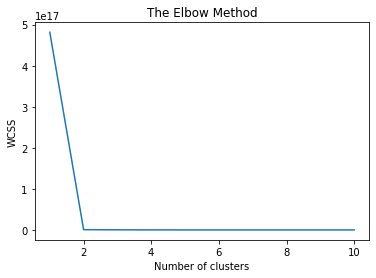

In [50]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means model on the dataset

In [51]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()